<a href="https://colab.research.google.com/github/nm2fs/Kaggle-/blob/main/negin_pyspark_Chicago_crimes_all.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Download Chicago's Reported Crime Data

https://www.linkedin.com/learning/apache-pyspark-by-example/built-in-functions?autoSkip=true&resume=false&u=2203468

## Download and install Spark

In [2]:
!pip install findspark
!pip install pyspark==3.4.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.0-py2.py3-none-any.whl size=311317122 sha256=1b7406769dfbaa74d68fd547407a75e30cd571c38dab3d1908fe4329c1842bdb
  Stored in directory: /root/.cache/pip/wheels/7b/1b/4b/3363a1d04368e7ff0d408e57ff57966fcdf00583774e761327
Successfully built pyspark


In [3]:
import os

import findspark
import pyspark
from pyspark import SparkContext
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, lit, to_timestamp

!ls

sample_data


In [9]:
# !apt-get update
# !apt-get install openjdk-8-jdk-headless -qq > /dev/null
# !wget -q http://archive.apache.org/dist/spark/spark-2.3.1/spark-2.3.1-bin-hadoop2.7.tgz
# !tar xf spark-2.3.1-bin-hadoop2.7.tgz
# !pip install -q findspark

## Setup environment

In [4]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
spark

## Downloading and preprocessing Chicago's Reported Crime Data

In [6]:
!wget https://data.cityofchicago.org/api/views/ijzp-q8t2/rows.csv?accessType=DOWNLOAD

--2024-10-11 02:04:19--  https://data.cityofchicago.org/api/views/ijzp-q8t2/rows.csv?accessType=DOWNLOAD
Resolving data.cityofchicago.org (data.cityofchicago.org)... 35.170.133.124, 100.28.82.57, 174.129.43.10
Connecting to data.cityofchicago.org (data.cityofchicago.org)|35.170.133.124|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘rows.csv?accessType=DOWNLOAD’

rows.csv?accessType     [             <=>    ]   1.80G  3.15MB/s    in 10m 15s 

2024-10-11 02:14:35 (2.99 MB/s) - ‘rows.csv?accessType=DOWNLOAD’ saved [1930785619]



In [5]:
!ls

sample_data


In [7]:
# Rename the file
!mv rows.csv\?accessType\=DOWNLOAD reported-crimes.csv

In [8]:
rc = (
    spark.read.csv("reported-crimes.csv", header=True)
    .withColumn("Date", to_timestamp(col("Date"), "MM/dd/yyyy hh:mm:ss a"))
    .filter(col("Date") <= lit("2018-11-11"))
)
rc.show(5)

+--------+-----------+-------------------+------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+
|      ID|Case Number|               Date|             Block|IUCR|        Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|Latitude|Longitude|Location|
+--------+-----------+-------------------+------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+
| 5741943|   HN549294|2007-08-25 09:22:18|074XX N ROGERS AVE|0560|             ASSAULT|              SIMPLE|               OTHER| false|   false|2422|     024|  49|             1|     08A|     

# Schemas

Schema is to see the column names along with the column data types

In [15]:
rc.printSchema()

root
 |-- ID: string (nullable = true)
 |-- Case Number: string (nullable = true)
 |-- Date: timestamp (nullable = true)
 |-- Block: string (nullable = true)
 |-- IUCR: string (nullable = true)
 |-- Primary Type: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Location Description: string (nullable = true)
 |-- Arrest: string (nullable = true)
 |-- Domestic: string (nullable = true)
 |-- Beat: string (nullable = true)
 |-- District: string (nullable = true)
 |-- Ward: string (nullable = true)
 |-- Community Area: string (nullable = true)
 |-- FBI Code: string (nullable = true)
 |-- X Coordinate: string (nullable = true)
 |-- Y Coordinate: string (nullable = true)
 |-- Year: string (nullable = true)
 |-- Updated On: string (nullable = true)
 |-- Latitude: string (nullable = true)
 |-- Longitude: string (nullable = true)
 |-- Location: string (nullable = true)



In [16]:
from pyspark.sql.types import StructType, StructField, StringType, TimestampType, BooleanType, DoubleType, IntegerType

In [17]:
rc.columns

['ID',
 'Case Number',
 'Date',
 'Block',
 'IUCR',
 'Primary Type',
 'Description',
 'Location Description',
 'Arrest',
 'Domestic',
 'Beat',
 'District',
 'Ward',
 'Community Area',
 'FBI Code',
 'X Coordinate',
 'Y Coordinate',
 'Year',
 'Updated On',
 'Latitude',
 'Longitude',
 'Location']

In [18]:
labels = [
    ('ID', StringType()),
    ('Case Number',StringType()),
    ('Date',TimestampType()),
    ('Block',StringType()),
    ('IUCR',StringType()),
    ('Primary Type',StringType()),
    ('Description',StringType()),
    ('Location Description',StringType()),
    ('Arrest',StringType()),
    ('Domestic',BooleanType()),
    ('Beat',StringType()),
    ('District',StringType()),
    ('Ward',StringType()),
    ('Community Area',StringType()),
    ('FBI Code',StringType()),
    ('X Coordinate',StringType()),
    ('Y Coordinate',StringType()),
    ('Year',IntegerType()),
    ('Updated On',StringType()),
    ('Latitude',DoubleType()),
    ('Longitude',DoubleType()),
    ('Location', StringType())
]

In [19]:
schema = StructType([StructField (x[0], x[1], True) for x in labels])
schema

StructType([StructField('ID', StringType(), True), StructField('Case Number', StringType(), True), StructField('Date', TimestampType(), True), StructField('Block', StringType(), True), StructField('IUCR', StringType(), True), StructField('Primary Type', StringType(), True), StructField('Description', StringType(), True), StructField('Location Description', StringType(), True), StructField('Arrest', StringType(), True), StructField('Domestic', BooleanType(), True), StructField('Beat', StringType(), True), StructField('District', StringType(), True), StructField('Ward', StringType(), True), StructField('Community Area', StringType(), True), StructField('FBI Code', StringType(), True), StructField('X Coordinate', StringType(), True), StructField('Y Coordinate', StringType(), True), StructField('Year', IntegerType(), True), StructField('Updated On', StringType(), True), StructField('Latitude', DoubleType(), True), StructField('Longitude', DoubleType(), True), StructField('Location', String

In [20]:
rc = spark.read.csv('reported-crimes.csv', schema = schema)
rc.printSchema()

root
 |-- ID: string (nullable = true)
 |-- Case Number: string (nullable = true)
 |-- Date: timestamp (nullable = true)
 |-- Block: string (nullable = true)
 |-- IUCR: string (nullable = true)
 |-- Primary Type: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Location Description: string (nullable = true)
 |-- Arrest: string (nullable = true)
 |-- Domestic: boolean (nullable = true)
 |-- Beat: string (nullable = true)
 |-- District: string (nullable = true)
 |-- Ward: string (nullable = true)
 |-- Community Area: string (nullable = true)
 |-- FBI Code: string (nullable = true)
 |-- X Coordinate: string (nullable = true)
 |-- Y Coordinate: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Updated On: string (nullable = true)
 |-- Latitude: double (nullable = true)
 |-- Longitude: double (nullable = true)
 |-- Location: string (nullable = true)



In [21]:
rc.show(5)

+--------+-----------+----+--------------------+----+------------+-------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|Date|               Block|IUCR|Primary Type|        Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+----+--------------------+----+------------+-------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|null|               Block|IUCR|Primary Type|        Description|Location Description|Arrest|    null|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|null|  

# Working with columns

## Display only the first 5 rows of the column name IUCR

In [22]:
rc.select("IUCR").show(5)

+----+
|IUCR|
+----+
|IUCR|
|0560|
|0110|
|0110|
|0620|
+----+
only showing top 5 rows



In [23]:
rc.select(rc.IUCR).show(5)

+----+
|IUCR|
+----+
|IUCR|
|0560|
|0110|
|0110|
|0620|
+----+
only showing top 5 rows



In [24]:
rc.select(col('IUCR')).show(5)

+----+
|IUCR|
+----+
|IUCR|
|0560|
|0110|
|0110|
|0620|
+----+
only showing top 5 rows



## Display only the first 4 rows of the column names Case Number, Date and Arrest

In [25]:
rc.select('Case Number', 'Date', 'Arrest').show(4)

+-----------+----+------+
|Case Number|Date|Arrest|
+-----------+----+------+
|Case Number|null|Arrest|
|   HN549294|null| false|
|   JE240540|null|  true|
|   JE279849|null|  true|
+-----------+----+------+
only showing top 4 rows



## Add a column with name One, with entries all 1s

In [26]:
from pyspark.sql.functions import lit

In [27]:
rc.withColumn('One', lit(1)).show(5)

+--------+-----------+----+--------------------+----+------------+-------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+---+
|      ID|Case Number|Date|               Block|IUCR|Primary Type|        Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|One|
+--------+-----------+----+--------------------+----+------------+-------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+---+
|      ID|Case Number|null|               Block|IUCR|Primary Type|        Description|Location Description|Arrest|    null|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordi

## Remove the column IUCR

In [28]:
rc = rc.drop('IUCR')
rc.show(5)

+--------+-----------+----+--------------------+------------+-------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|Date|               Block|Primary Type|        Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+----+--------------------+------------+-------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|null|               Block|Primary Type|        Description|Location Description|Arrest|    null|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|null|          Updated On| 

## Working with rows

In [29]:
one_day = spark.read.csv("reported-crimes.csv", header=True).withColumn("Date", to_timestamp(col("Date"), "MM/dd/yyyy hh:mm:ss a")).filter(col("Date") == lit("2018-11-12"))
one_day.count()

5

In [30]:
rc.union(one_day).orderBy('Date', ascending=False).show(5)

AnalysisException: [NUM_COLUMNS_MISMATCH] UNION can only be performed on inputs with the same number of columns, but the first input has 21 columns and the second input has 22 columns.;
'Union false, false
:- Project [ID#196, Case Number#197, Date#198, Block#199, Primary Type#201, Description#202, Location Description#203, Arrest#204, Domestic#205, Beat#206, District#207, Ward#208, Community Area#209, FBI Code#210, X Coordinate#211, Y Coordinate#212, Year#213, Updated On#214, Latitude#215, Longitude#216, Location#217]
:  +- Relation [ID#196,Case Number#197,Date#198,Block#199,IUCR#200,Primary Type#201,Description#202,Location Description#203,Arrest#204,Domestic#205,Beat#206,District#207,Ward#208,Community Area#209,FBI Code#210,X Coordinate#211,Y Coordinate#212,Year#213,Updated On#214,Latitude#215,Longitude#216,Location#217] csv
+- Filter (Date#719 = cast(2018-11-12 as timestamp))
   +- Project [ID#675, Case Number#676, to_timestamp(Date#677, Some(MM/dd/yyyy hh:mm:ss a), TimestampType, Some(Etc/UTC), false) AS Date#719, Block#678, IUCR#679, Primary Type#680, Description#681, Location Description#682, Arrest#683, Domestic#684, Beat#685, District#686, Ward#687, Community Area#688, FBI Code#689, X Coordinate#690, Y Coordinate#691, Year#692, Updated On#693, Latitude#694, Longitude#695, Location#696]
      +- Relation [ID#675,Case Number#676,Date#677,Block#678,IUCR#679,Primary Type#680,Description#681,Location Description#682,Arrest#683,Domestic#684,Beat#685,District#686,Ward#687,Community Area#688,FBI Code#689,X Coordinate#690,Y Coordinate#691,Year#692,Updated On#693,Latitude#694,Longitude#695,Location#696] csv


## What are the top number of reported crimes by primary type, in descending order of occurence?

In [31]:
rc.groupBy('Primary Type').count().show()

+--------------------+-------+
|        Primary Type|  count|
+--------------------+-------+
|OFFENSE INVOLVING...|  58569|
|CRIMINAL SEXUAL A...|   9469|
|            STALKING|   5562|
|PUBLIC PEACE VIOL...|  53726|
|           OBSCENITY|    887|
|               ARSON|  14001|
|   DOMESTIC VIOLENCE|      1|
|            GAMBLING|  14647|
|   CRIMINAL TRESPASS| 221244|
|             ASSAULT| 541738|
|LIQUOR LAW VIOLATION|  15185|
| MOTOR VEHICLE THEFT| 412716|
|               THEFT|1729812|
|             BATTERY|1490333|
|             ROBBERY| 307669|
|            HOMICIDE|  13476|
|           RITUALISM|     24|
|    PUBLIC INDECENCY|    205|
| CRIM SEXUAL ASSAULT|  27441|
|   HUMAN TRAFFICKING|    105|
+--------------------+-------+
only showing top 20 rows



In [32]:
rc.groupBy('Primary Type').count().orderBy('count', ascending = False).show(10)
# Remember to have an aggregation function like 'count' when you are using groupBy function.

+-------------------+-------+
|       Primary Type|  count|
+-------------------+-------+
|              THEFT|1729812|
|            BATTERY|1490333|
|    CRIMINAL DAMAGE| 930702|
|          NARCOTICS| 756079|
|            ASSAULT| 541738|
|      OTHER OFFENSE| 507826|
|           BURGLARY| 435783|
|MOTOR VEHICLE THEFT| 412716|
| DECEPTIVE PRACTICE| 370854|
|            ROBBERY| 307669|
+-------------------+-------+
only showing top 10 rows



# Challenge Objectives:

## Find the percentage of reported crimes that resulted in an arrest?

In [33]:
rc.select('Arrest').distinct().show()

+------+
|Arrest|
+------+
|Arrest|
| false|
|  true|
+------+



In [34]:
rc.printSchema()

root
 |-- ID: string (nullable = true)
 |-- Case Number: string (nullable = true)
 |-- Date: timestamp (nullable = true)
 |-- Block: string (nullable = true)
 |-- Primary Type: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Location Description: string (nullable = true)
 |-- Arrest: string (nullable = true)
 |-- Domestic: boolean (nullable = true)
 |-- Beat: string (nullable = true)
 |-- District: string (nullable = true)
 |-- Ward: string (nullable = true)
 |-- Community Area: string (nullable = true)
 |-- FBI Code: string (nullable = true)
 |-- X Coordinate: string (nullable = true)
 |-- Y Coordinate: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Updated On: string (nullable = true)
 |-- Latitude: double (nullable = true)
 |-- Longitude: double (nullable = true)
 |-- Location: string (nullable = true)



In [35]:
rc.filter(col('Arrest') == 'true').count() / rc.select('Arrest').count()

0.25507864607936803

OR

In [36]:
# Total number of reported crimes
total_crimes = rc.count()
print(total_crimes)

8173389


In [37]:
# Number of crimes that resulted in an arrest
arrests = rc.filter(rc['Arrest'] == True).count()
print(arrests)

2084857


In [38]:
# Calculate the percentage of crimes that resulted in an arrest
percentage_arrests = (arrests / total_crimes) * 100

# Show the result
print(f"Percentage of reported crimes that resulted in an arrest: {percentage_arrests:.2f}%")


Percentage of reported crimes that resulted in an arrest: 25.51%


## Find the top 3 locations for reported crimes?

In [39]:
rc.groupBy('Location Description').count().orderBy('count', ascending = False).show(5)

+--------------------+-------+
|Location Description|  count|
+--------------------+-------+
|              STREET|2136496|
|           RESIDENCE|1352485|
|           APARTMENT| 951640|
|            SIDEWALK| 749646|
|               OTHER| 269991|
+--------------------+-------+
only showing top 5 rows



# Built-in Functions:

In [40]:
from pyspark.sql import functions
print(dir(functions))

['Any', 'ArrayType', 'Callable', 'Column', 'DataFrame', 'DataType', 'Dict', 'Iterable', 'JVMView', 'List', 'Optional', 'PandasUDFType', 'PySparkTypeError', 'PySparkValueError', 'PythonEvalType', 'SparkContext', 'StringType', 'StructType', 'TYPE_CHECKING', 'Tuple', 'Union', 'UserDefinedFunction', 'ValuesView', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', '_create_column_from_literal', '_create_lambda', '_create_py_udf', '_from_numpy_type', '_get_jvm_function', '_get_lambda_parameters', '_invoke_binary_math_function', '_invoke_function', '_invoke_function_over_columns', '_invoke_function_over_seq_of_columns', '_invoke_higher_order_function', '_options_to_str', '_test', '_to_java_column', '_to_seq', '_unresolved_named_lambda_variable', 'abs', 'acos', 'acosh', 'add_months', 'aggregate', 'approxCountDistinct', 'approx_count_distinct', 'array', 'array_append', 'array_compact', 'array_contains', 'array_distinct', 'array_except', 'ar

## String functions:

Display the Primary Type column in lower and upper charachters, and the first 4 charachters of the column

In [41]:
from pyspark.sql.functions import lower, upper, substring

help(substring)

Help on function substring in module pyspark.sql.functions:

substring(str: 'ColumnOrName', pos: int, len: int) -> pyspark.sql.column.Column
    Substring starts at `pos` and is of length `len` when str is String type or
    returns the slice of byte array that starts at `pos` in byte and is of length `len`
    when str is Binary type.
    
    .. versionadded:: 1.5.0
    
    .. versionchanged:: 3.4.0
        Supports Spark Connect.
    
    Notes
    -----
    The position is not zero based, but 1 based index.
    
    Parameters
    ----------
    str : :class:`~pyspark.sql.Column` or str
        target column to work on.
    pos : int
        starting position in str.
    len : int
        length of chars.
    
    Returns
    -------
    :class:`~pyspark.sql.Column`
        substring of given value.
    
    Examples
    --------
    >>> df = spark.createDataFrame([('abcd',)], ['s',])
    >>> df.select(substring(df.s, 1, 2).alias('s')).collect()
    [Row(s='ab')]



In [42]:
rc.select(lower(col('Primary Type')), upper(col('Primary Type')), substring(col('Primary Type'), 1, 4)).show(5)

+-------------------+-------------------+-----------------------------+
|lower(Primary Type)|upper(Primary Type)|substring(Primary Type, 1, 4)|
+-------------------+-------------------+-----------------------------+
|       primary type|       PRIMARY TYPE|                         Prim|
|            assault|            ASSAULT|                         ASSA|
|           homicide|           HOMICIDE|                         HOMI|
|           homicide|           HOMICIDE|                         HOMI|
|           burglary|           BURGLARY|                         BURG|
+-------------------+-------------------+-----------------------------+
only showing top 5 rows



## Numeric Functions:

Show the oldest date and the most recent date

In [43]:
from pyspark.sql.functions import min, max

In [44]:
rc.select(min(col('Date')), max(col('Date'))).show(2)

ERROR:root:KeyboardInterrupt while sending command.
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/py4j/java_gateway.py", line 1038, in send_command
    response = connection.send_command(command)
  File "/usr/local/lib/python3.10/dist-packages/py4j/clientserver.py", line 511, in send_command
    answer = smart_decode(self.stream.readline()[:-1])
  File "/usr/lib/python3.10/socket.py", line 705, in readinto
    return self._sock.recv_into(b)
KeyboardInterrupt


KeyboardInterrupt: 

## Date

What is 3 days earlier than the oldest date and 3 days later than the most recent date?

In [45]:
from pyspark.sql.functions import date_add, date_sub

In [46]:
help(date_add)

Help on function date_add in module pyspark.sql.functions:

date_add(start: 'ColumnOrName', days: Union[ForwardRef('ColumnOrName'), int]) -> pyspark.sql.column.Column
    Returns the date that is `days` days after `start`. If `days` is a negative value
    then these amount of days will be deducted from `start`.
    
    .. versionadded:: 1.5.0
    
    .. versionchanged:: 3.4.0
        Supports Spark Connect.
    
    Parameters
    ----------
    start : :class:`~pyspark.sql.Column` or str
        date column to work on.
    days : :class:`~pyspark.sql.Column` or str or int
        how many days after the given date to calculate.
        Accepts negative value as well to calculate backwards in time.
    
    Returns
    -------
    :class:`~pyspark.sql.Column`
        a date after/before given number of days.
    
    Examples
    --------
    >>> df = spark.createDataFrame([('2015-04-08', 2,)], ['dt', 'add'])
    >>> df.select(date_add(df.dt, 1).alias('next_date')).collect()
    [Ro

In [47]:
rc.select(date_sub(min(col('Date')), 3), date_add(max(col('Date')), 3)).show(2)

ERROR:root:KeyboardInterrupt while sending command.
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/py4j/java_gateway.py", line 1038, in send_command
    response = connection.send_command(command)
  File "/usr/local/lib/python3.10/dist-packages/py4j/clientserver.py", line 511, in send_command
    answer = smart_decode(self.stream.readline()[:-1])
  File "/usr/lib/python3.10/socket.py", line 705, in readinto
    return self._sock.recv_into(b)
KeyboardInterrupt


KeyboardInterrupt: 

# Working with Dates:

In [48]:
from pyspark.sql.functions import to_date, to_timestamp, lit      # literal function if we need it

**`2019-12-25 13:30:00`**

In [49]:
df = spark.createDataFrame([('2019-12-25 13:30:00',)], ['Christmas'])       # Christmas is the column name
df.show(2)

+-------------------+
|          Christmas|
+-------------------+
|2019-12-25 13:30:00|
+-------------------+



In [50]:
df.select(to_date(col('Christmas'), 'yyyy-MM-dd HH:mm:ss'), to_timestamp(col('Christmas'), 'yyyy-MM-dd HH:mm:ss')).show(2)

+---------------------------------------+--------------------------------------------+
|to_date(Christmas, yyyy-MM-dd HH:mm:ss)|to_timestamp(Christmas, yyyy-MM-dd HH:mm:ss)|
+---------------------------------------+--------------------------------------------+
|                             2019-12-25|                         2019-12-25 13:30:00|
+---------------------------------------+--------------------------------------------+



**25/Dec/2019 13:30:00**

In [51]:
df = spark.createDataFrame([('25/Dec/2019 13:30:00',)], ['Christmas'])
df.show(2)

+--------------------+
|           Christmas|
+--------------------+
|25/Dec/2019 13:30:00|
+--------------------+



In [52]:
df.select(to_date(col('Christmas'), 'dd/MMM/yyyy HH:mm:ss'), to_timestamp(col('Christmas'), 'dd/MMM/yyyy HH:mm:ss')).show(2)

+----------------------------------------+---------------------------------------------+
|to_date(Christmas, dd/MMM/yyyy HH:mm:ss)|to_timestamp(Christmas, dd/MMM/yyyy HH:mm:ss)|
+----------------------------------------+---------------------------------------------+
|                              2019-12-25|                          2019-12-25 13:30:00|
+----------------------------------------+---------------------------------------------+



**12/25/2019 1:30:00 PM**

In [53]:
df = spark.createDataFrame([('12/25/2019 01:30:00 PM',)], ['Christmas'])
df.show(2, truncate=False)    # Truncate = False means that we want to see the whole column inputs. when they are long they are shown as ... as the input

+----------------------+
|Christmas             |
+----------------------+
|12/25/2019 01:30:00 PM|
+----------------------+



In [55]:
df.select(to_date(col('Christmas'), 'MM/dd/yyyy hh:mm:ss aa'), to_timestamp(col('Christmas'), 'MM/dd/yyyy hh:mm:ss aa')).show(2)

SparkUpgradeException: [INCONSISTENT_BEHAVIOR_CROSS_VERSION.DATETIME_PATTERN_RECOGNITION] You may get a different result due to the upgrading to Spark >= 3.0:
Fail to recognize 'MM/dd/yyyy hh:mm:ss aa' pattern in the DateTimeFormatter. 1) You can set "spark.sql.legacy.timeParserPolicy" to "LEGACY" to restore the behavior before Spark 3.0. 2) You can form a valid datetime pattern with the guide from 'https://spark.apache.org/docs/latest/sql-ref-datetime-pattern.html'.

[INCONSISTENT_BEHAVIOR_CROSS_VERSION.DATETIME_PATTERN_RECOGNITION] You may get a different result due to the upgrading to Spark >= 3.0:
Fail to recognize 'MM/dd/yyyy hh:mm:ss aa' pattern in the DateTimeFormatter. 1) You can set "spark.sql.legacy.timeParserPolicy" to "LEGACY" to restore the behavior before Spark 3.0. 2) You can form a valid datetime pattern with the guide from 'https://spark.apache.org/docs/latest/sql-ref-datetime-pattern.html'.

In [ ]:
# from pyspark.sql import SparkSession

# spark = SparkSession.builder \
#     .config("spark.sql.legacy.timeParserPolicy", "LEGACY") \
#     .getOrCreate()


In [9]:
nrc = spark.read.csv('reported-crimes.csv', header=True)
nrc.show(5, truncate=False)

+--------+-----------+----------------------+-------------------------+----+------------+-------------------------------------------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+----------------------+------------+-------------+-----------------------------+
|ID      |Case Number|Date                  |Block                    |IUCR|Primary Type|Description                                            |Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|Updated On            |Latitude    |Longitude    |Location                     |
+--------+-----------+----------------------+-------------------------+----+------------+-------------------------------------------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+----------------------+------------+-------------+--------------------

# User-defined functions

## Join

* Inner Join: Keeps rows that exist in both datasets
* Outer Join: Keeps rows with keys in either dataset
* Left Outer Join: Keeps rows with keys in the left dataset
* Right Outer Join: Keep rows with keys in the right dataset

In [10]:
!ls

reported-crimes.csv  sample_data


In [ ]:
# !apt-get update
# !apt-get install openjdk-8-jdk-headless -qq > /dev/null
# !wget -q http://archive.apache.org/dist/spark/spark-2.3.1/spark-2.3.1-bin-hadoop2.7.tgz
# !tar xf spark-2.3.1-bin-hadoop2.7.tgz
# !pip install -q findspark

In [60]:
# from pyspark.sql import SparkSession
# spark = SparkSession.builder.master("local[*]").getOrCreate()
# spark

In [11]:
# Download police dataset

!wget -O police-station.csv https://data.cityofchicago.org/api/views/z8bn-74gv/rows.csv?accessType=DOWNLOAD
!ls

--2024-10-11 02:14:43--  https://data.cityofchicago.org/api/views/z8bn-74gv/rows.csv?accessType=DOWNLOAD
Resolving data.cityofchicago.org (data.cityofchicago.org)... 100.28.82.57, 35.170.133.124, 174.129.43.10
Connecting to data.cityofchicago.org (data.cityofchicago.org)|100.28.82.57|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘police-station.csv’

police-station.csv      [ <=>                ]   5.57K  --.-KB/s    in 0s      

2024-10-11 02:14:43 (2.19 GB/s) - ‘police-station.csv’ saved [5699]

police-station.csv  reported-crimes.csv  sample_data


In [12]:
ps = spark.read.csv('police-station.csv', header=True)
ps.show(5, truncate=False)

+------------+-------------+-------------------+-------+-----+-----+----------------------------------------------------------------------------+------------+------------+------------+------------+------------+-----------+------------+-------------------------------+
|DISTRICT    |DISTRICT NAME|ADDRESS            |CITY   |STATE|ZIP  |WEBSITE                                                                     |PHONE       |FAX         |TTY         |X COORDINATE|Y COORDINATE|LATITUDE   |LONGITUDE   |LOCATION                       |
+------------+-------------+-------------------+-------+-----+-----+----------------------------------------------------------------------------+------------+------------+------------+------------+------------+-----------+------------+-------------------------------+
|Headquarters|Headquarters |3510 S Michigan Ave|Chicago|IL   |60653|http://home.chicagopolice.org                                               |null        |null        |null        |1177731.401 

**The reported crimes dataset has only the district number. Add the district name by joining with the police station dataset**

In [68]:
rc.cache()
rc.count()

ERROR:root:KeyboardInterrupt while sending command.
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/py4j/java_gateway.py", line 1038, in send_command
    response = connection.send_command(command)
  File "/usr/local/lib/python3.10/dist-packages/py4j/clientserver.py", line 511, in send_command
    answer = smart_decode(self.stream.readline()[:-1])
  File "/usr/lib/python3.10/socket.py", line 705, in readinto
    return self._sock.recv_into(b)
KeyboardInterrupt


KeyboardInterrupt: 

In [73]:
ps.select(col('DISTRICT')).distinct().show(30)

ERROR:root:KeyboardInterrupt while sending command.
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/py4j/java_gateway.py", line 1038, in send_command
    response = connection.send_command(command)
  File "/usr/local/lib/python3.10/dist-packages/py4j/clientserver.py", line 511, in send_command
    answer = smart_decode(self.stream.readline()[:-1])
  File "/usr/lib/python3.10/socket.py", line 705, in readinto
    return self._sock.recv_into(b)
KeyboardInterrupt


KeyboardInterrupt: 

In [ ]:
rc.select(col('District')).distinct().show(30)

In one of the datasets, there is a leading 0 on the District column. So we need to add a 0 to the left of the DISTRICT column inputs.

In [13]:
from pyspark.sql.functions import lpad

In [14]:
help(lpad)

Help on function lpad in module pyspark.sql.functions:

lpad(col: 'ColumnOrName', len: int, pad: str) -> pyspark.sql.column.Column
    Left-pad the string column to width `len` with `pad`.
    
    .. versionadded:: 1.5.0
    
    .. versionchanged:: 3.4.0
        Supports Spark Connect.
    
    Parameters
    ----------
    col : :class:`~pyspark.sql.Column` or str
        target column to work on.
    len : int
        length of the final string.
    pad : str
        chars to prepend.
    
    Returns
    -------
    :class:`~pyspark.sql.Column`
        left padded result.
    
    Examples
    --------
    >>> df = spark.createDataFrame([('abcd',)], ['s',])
    >>> df.select(lpad(df.s, 6, '#').alias('s')).collect()
    [Row(s='##abcd')]



In [15]:
ps.select(lpad(col('DISTRICT'), 3, '0')).show()

+--------------------+
|lpad(DISTRICT, 3, 0)|
+--------------------+
|                 Hea|
|                 018|
|                 019|
|                 020|
|                 022|
|                 024|
|                 025|
|                 001|
|                 002|
|                 003|
|                 004|
|                 005|
|                 006|
|                 007|
|                 008|
|                 009|
|                 010|
|                 011|
|                 012|
|                 ",C|
+--------------------+
only showing top 20 rows



In [16]:
# Add a new Column
ps = ps.withColumn('Format_district', lpad(col('DISTRICT'), 3, '0'))
ps.show(5)

+------------+-------------+-------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+---------------+
|    DISTRICT|DISTRICT NAME|            ADDRESS|   CITY|STATE|  ZIP|             WEBSITE|       PHONE|         FAX|         TTY|X COORDINATE|Y COORDINATE|   LATITUDE|   LONGITUDE|            LOCATION|Format_district|
+------------+-------------+-------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+---------------+
|Headquarters| Headquarters|3510 S Michigan Ave|Chicago|   IL|60653|http://home.chica...|        null|        null|        null| 1177731.401| 1881697.404|41.83070169|-87.62339535|(41.8307016873, -...|            Hea|
|          18|   Near North| 1160 N Larrabee St|Chicago|   IL|60610|http://home.chica...|312-742-5870|312-742-5771|312-742-5773| 117

In [17]:
rc.join(ps, rc.District == ps.Format_district, 'left_outer').show(5)

+--------+-----------+-------------------+------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+--------+-------------+-----------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+---------------+
|      ID|Case Number|               Date|             Block|IUCR|        Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|Latitude|Longitude|Location|DISTRICT|DISTRICT NAME|          ADDRESS|   CITY|STATE|  ZIP|             WEBSITE|       PHONE|         FAX|         TTY|X COORDINATE|Y COORDINATE|   LATITUDE|   LONGITUDE|            LOCATION|Format_district|
+--------+-----------+-------------------+--

In [18]:
ps.columns

['DISTRICT',
 'DISTRICT NAME',
 'ADDRESS',
 'CITY',
 'STATE',
 'ZIP',
 'WEBSITE',
 'PHONE',
 'FAX',
 'TTY',
 'X COORDINATE',
 'Y COORDINATE',
 'LATITUDE',
 'LONGITUDE',
 'LOCATION',
 'Format_district']

In [20]:
rc.join(ps, rc.District == ps.Format_district, 'left_outer').drop('ADDRESS',
 'CITY',
 'STATE',
 'ZIP',
 'WEBSITE',
 'PHONE',
 'FAX',
 'TTY',
 'X COORDINATE',
 'Y COORDINATE',
 'LATITUDE',
 'LONGITUDE',
 'LOCATION',
 'Format_district').show(5)

+--------+-----------+-------------------+------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+----+--------------------+--------+-------------+
|      ID|Case Number|               Date|             Block|IUCR|        Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|Year|          Updated On|DISTRICT|DISTRICT NAME|
+--------+-----------+-------------------+------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+----+--------------------+--------+-------------+
| 5741943|   HN549294|2007-08-25 09:22:18|074XX N ROGERS AVE|0560|             ASSAULT|              SIMPLE|               OTHER| false|   false|2422|     024|  49|             1|     08A|2007|08/17/2015 03:03:...|      24|  Rogers Park|
| 1930689|   HH109118|2002-01-05 21:24:00|    00

# Challenge Objectives:

**1. Find the most frequently reported noncriminal activity**

In [26]:
rc.select(col('Primary Type')).distinct().count()

36

In [29]:
rc.select(col('Primary Type')).distinct().orderBy(col('Primary Type')).show(35, truncate=False)

+---------------------------------+
|Primary Type                     |
+---------------------------------+
|ARSON                            |
|ASSAULT                          |
|BATTERY                          |
|BURGLARY                         |
|CONCEALED CARRY LICENSE VIOLATION|
|CRIM SEXUAL ASSAULT              |
|CRIMINAL DAMAGE                  |
|CRIMINAL SEXUAL ASSAULT          |
|CRIMINAL TRESPASS                |
|DECEPTIVE PRACTICE               |
|DOMESTIC VIOLENCE                |
|GAMBLING                         |
|HOMICIDE                         |
|HUMAN TRAFFICKING                |
|INTERFERENCE WITH PUBLIC OFFICER |
|INTIMIDATION                     |
|KIDNAPPING                       |
|LIQUOR LAW VIOLATION             |
|MOTOR VEHICLE THEFT              |
|NARCOTICS                        |
|NON - CRIMINAL                   |
|NON-CRIMINAL                     |
|NON-CRIMINAL (SUBJECT SPECIFIED) |
|OBSCENITY                        |
|OFFENSE INVOLVING CHILDREN 

In [31]:
nc = rc.filter((col('Primary Type') == 'NON - CRIMINAL')| (col('Primary Type') == 'NON-CRIMINAL') | (col('Primary Type') == 'NON-CRIMINAL (SUBJECT SPECIFIED)'))
nc.show()

+-------+-----------+-------------------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|     ID|Case Number|               Date|               Block|IUCR|        Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+-------+-----------+-------------------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|8773145|   HV447848|2012-08-25 15:00:00|    100XX W OHARE ST|5093|        NON-CRIMINAL|       LOST PASSPORT|AIRPORT TERMINAL ...|

In [32]:
nc.groupBy('Description').count().orderBy('count', ascending=False).show(truncate=False)

+-------------------------------------------+-----+
|Description                                |count|
+-------------------------------------------+-----+
|LOST PASSPORT                              |107  |
|FOID - REVOCATION                          |75   |
|NOTIFICATION OF CIVIL NO CONTACT ORDER     |9    |
|NOTIFICATION OF STALKING - NO CONTACT ORDER|8    |
|FOUND PASSPORT                             |4    |
|CONCEALED CARRY LICENSE REVOCATION         |4    |
|GUN OFFENDER NOTIFICATION-NO CONTACT       |3    |
+-------------------------------------------+-----+



**2. Find the day of the week with the most reported crime**

In [33]:
from pyspark.sql.functions import dayofweek

In [34]:
help(dayofweek)

Help on function dayofweek in module pyspark.sql.functions:

dayofweek(col: 'ColumnOrName') -> pyspark.sql.column.Column
    Extract the day of the week of a given date/timestamp as integer.
    Ranges from 1 for a Sunday through to 7 for a Saturday
    
    .. versionadded:: 2.3.0
    
    .. versionchanged:: 3.4.0
        Supports Spark Connect.
    
    Parameters
    ----------
    col : :class:`~pyspark.sql.Column` or str
        target date/timestamp column to work on.
    
    Returns
    -------
    :class:`~pyspark.sql.Column`
        day of the week for given date/timestamp as integer.
    
    Examples
    --------
    >>> df = spark.createDataFrame([('2015-04-08',)], ['dt'])
    >>> df.select(dayofweek('dt').alias('day')).collect()
    [Row(day=4)]



In [35]:
rc.show(5)

+--------+-----------+-------------------+------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+
|      ID|Case Number|               Date|             Block|IUCR|        Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|Latitude|Longitude|Location|
+--------+-----------+-------------------+------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+
| 5741943|   HN549294|2007-08-25 09:22:18|074XX N ROGERS AVE|0560|             ASSAULT|              SIMPLE|               OTHER| false|   false|2422|     024|  49|             1|     08A|     

In [36]:
rc.select(col('Date'), dayofweek(col('Date'))).show(5)

+-------------------+---------------+
|               Date|dayofweek(Date)|
+-------------------+---------------+
|2007-08-25 09:22:18|              7|
|2002-01-05 21:24:00|              7|
|2011-08-10 00:01:00|              4|
|2015-09-24 00:00:00|              5|
|2014-09-07 00:00:00|              1|
+-------------------+---------------+
only showing top 5 rows



In [37]:
from pyspark.sql.functions import date_format

In [38]:
help(date_format)

Help on function date_format in module pyspark.sql.functions:

date_format(date: 'ColumnOrName', format: str) -> pyspark.sql.column.Column
    Converts a date/timestamp/string to a value of string in the format specified by the date
    format given by the second argument.
    
    A pattern could be for instance `dd.MM.yyyy` and could return a string like '18.03.1993'. All
    pattern letters of `datetime pattern`_. can be used.
    
    .. _datetime pattern: https://spark.apache.org/docs/latest/sql-ref-datetime-pattern.html
    
    .. versionadded:: 1.5.0
    
    .. versionchanged:: 3.4.0
        Supports Spark Connect.
    
    Notes
    -----
    Whenever possible, use specialized functions like `year`.
    
    Parameters
    ----------
    date : :class:`~pyspark.sql.Column` or str
        input column of values to format.
    format: str
        format to use to represent datetime values.
    
    Returns
    -------
    :class:`~pyspark.sql.Column`
        string value repres

In [39]:
rc.select(col('Date'), dayofweek(col('Date')), date_format(col('Date'),'E')).show(5)

+-------------------+---------------+--------------------+
|               Date|dayofweek(Date)|date_format(Date, E)|
+-------------------+---------------+--------------------+
|2007-08-25 09:22:18|              7|                 Sat|
|2002-01-05 21:24:00|              7|                 Sat|
|2011-08-10 00:01:00|              4|                 Wed|
|2015-09-24 00:00:00|              5|                 Thu|
|2014-09-07 00:00:00|              1|                 Sun|
+-------------------+---------------+--------------------+
only showing top 5 rows



In [40]:
rc.groupBy(date_format(col('Date'),'E')).count().orderBy('count', ascending=False).show()

+--------------------+-------+
|date_format(Date, E)|  count|
+--------------------+-------+
|                 Fri|1017534|
|                 Wed| 974457|
|                 Tue| 968609|
|                 Sat| 965659|
|                 Thu| 965195|
|                 Mon| 953321|
|                 Sun| 912515|
+--------------------+-------+



In [41]:
rc.groupBy(date_format(col('Date'),'E')).count().collect()

[Row(date_format(Date, E)='Sun', count=912515),
 Row(date_format(Date, E)='Mon', count=953321),
 Row(date_format(Date, E)='Thu', count=965195),
 Row(date_format(Date, E)='Sat', count=965659),
 Row(date_format(Date, E)='Wed', count=974457),
 Row(date_format(Date, E)='Fri', count=1017534),
 Row(date_format(Date, E)='Tue', count=968609)]

In [42]:
#Capture the first element by x[0]
dow = [x[0] for x in rc.groupBy(date_format(col('Date'),'E')).count().collect()]
dow

['Sun', 'Mon', 'Thu', 'Sat', 'Wed', 'Fri', 'Tue']

In [43]:
#Capture the second element by x[1]
cnt = [x[1] for x in rc.groupBy(date_format(col('Date'),'E')).count().collect()]
cnt

[912515, 953321, 965195, 965659, 974457, 1017534, 968609]

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

In [48]:
# Create a dictionary
cp = pd.DataFrame({'Day_of_Week': dow, 'Count': cnt})
cp

,Day_of_Week,Count
0,Sun,912515
1,Mon,953321
2,Thu,965195
3,Sat,965659
4,Wed,974457
5,Fri,1017534
6,Tue,968609


Text(0.5, 1.0, 'No. of reported crimes per day of the week from 2001 to present')

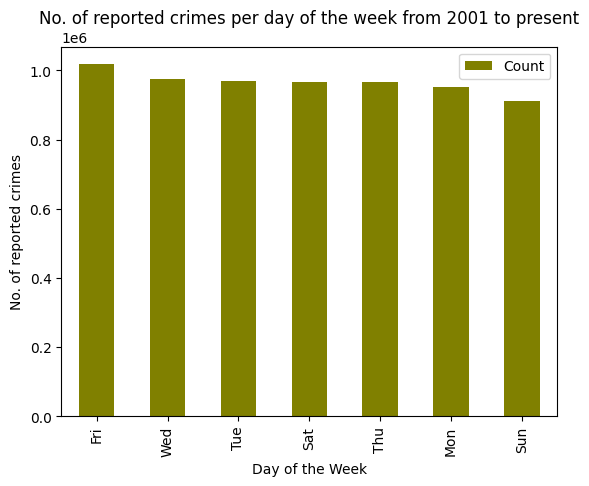

In [52]:
cp.sort_values('Count', ascending=False).plot(kind= 'bar', color = 'olive', x=  'Day_of_Week', y = 'Count')
plt.xlabel('Day of the Week')
plt.ylabel('No. of reported crimes')
plt.title('No. of reported crimes per day of the week from 2001 to present')


# Resilient Distributed Datasets (RDDs):

RDD is an immutable partitioned collection of records that can be worked on parallel.

## RDDs Setup:

In [60]:
import findspark
findspark.init()
from pyspark import SparkContext
sc = SparkContext.getOrCreate()

psrdd = sc.textFile('police-stations.csv')
psrdd.first()

Py4JJavaError: An error occurred while calling o232.partitions.
: org.apache.hadoop.mapred.InvalidInputException: Input path does not exist: file:/content/police-stations.csv
	at org.apache.hadoop.mapred.FileInputFormat.singleThreadedListStatus(FileInputFormat.java:304)
	at org.apache.hadoop.mapred.FileInputFormat.listStatus(FileInputFormat.java:244)
	at org.apache.hadoop.mapred.FileInputFormat.getSplits(FileInputFormat.java:332)
	at org.apache.spark.rdd.HadoopRDD.getPartitions(HadoopRDD.scala:208)
	at org.apache.spark.rdd.RDD.$anonfun$partitions$2(RDD.scala:291)
	at scala.Option.getOrElse(Option.scala:189)
	at org.apache.spark.rdd.RDD.partitions(RDD.scala:287)
	at org.apache.spark.rdd.MapPartitionsRDD.getPartitions(MapPartitionsRDD.scala:49)
	at org.apache.spark.rdd.RDD.$anonfun$partitions$2(RDD.scala:291)
	at scala.Option.getOrElse(Option.scala:189)
	at org.apache.spark.rdd.RDD.partitions(RDD.scala:287)
	at org.apache.spark.api.java.JavaRDDLike.partitions(JavaRDDLike.scala:61)
	at org.apache.spark.api.java.JavaRDDLike.partitions$(JavaRDDLike.scala:61)
	at org.apache.spark.api.java.AbstractJavaRDDLike.partitions(JavaRDDLike.scala:45)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at java.base/jdk.internal.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.base/java.lang.reflect.Method.invoke(Method.java:566)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:374)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.base/java.lang.Thread.run(Thread.java:829)
Caused by: java.io.IOException: Input path does not exist: file:/content/police-stations.csv
	at org.apache.hadoop.mapred.FileInputFormat.singleThreadedListStatus(FileInputFormat.java:278)
	... 25 more


In [57]:
ps_header = psrdd.first()

Py4JJavaError: An error occurred while calling o218.partitions.
: org.apache.hadoop.mapred.InvalidInputException: Input path does not exist: file:/content/police-stations.csv
	at org.apache.hadoop.mapred.FileInputFormat.singleThreadedListStatus(FileInputFormat.java:304)
	at org.apache.hadoop.mapred.FileInputFormat.listStatus(FileInputFormat.java:244)
	at org.apache.hadoop.mapred.FileInputFormat.getSplits(FileInputFormat.java:332)
	at org.apache.spark.rdd.HadoopRDD.getPartitions(HadoopRDD.scala:208)
	at org.apache.spark.rdd.RDD.$anonfun$partitions$2(RDD.scala:291)
	at scala.Option.getOrElse(Option.scala:189)
	at org.apache.spark.rdd.RDD.partitions(RDD.scala:287)
	at org.apache.spark.rdd.MapPartitionsRDD.getPartitions(MapPartitionsRDD.scala:49)
	at org.apache.spark.rdd.RDD.$anonfun$partitions$2(RDD.scala:291)
	at scala.Option.getOrElse(Option.scala:189)
	at org.apache.spark.rdd.RDD.partitions(RDD.scala:287)
	at org.apache.spark.api.java.JavaRDDLike.partitions(JavaRDDLike.scala:61)
	at org.apache.spark.api.java.JavaRDDLike.partitions$(JavaRDDLike.scala:61)
	at org.apache.spark.api.java.AbstractJavaRDDLike.partitions(JavaRDDLike.scala:45)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at java.base/jdk.internal.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.base/java.lang.reflect.Method.invoke(Method.java:566)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:374)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.base/java.lang.Thread.run(Thread.java:829)
Caused by: java.io.IOException: Input path does not exist: file:/content/police-stations.csv
	at org.apache.hadoop.mapred.FileInputFormat.singleThreadedListStatus(FileInputFormat.java:278)
	... 25 more


In [61]:
ps_rest = psrdd.filter(lambda line: line != ps_header)
ps_rest.first()

Py4JJavaError: An error occurred while calling o232.partitions.
: org.apache.hadoop.mapred.InvalidInputException: Input path does not exist: file:/content/police-stations.csv
	at org.apache.hadoop.mapred.FileInputFormat.singleThreadedListStatus(FileInputFormat.java:304)
	at org.apache.hadoop.mapred.FileInputFormat.listStatus(FileInputFormat.java:244)
	at org.apache.hadoop.mapred.FileInputFormat.getSplits(FileInputFormat.java:332)
	at org.apache.spark.rdd.HadoopRDD.getPartitions(HadoopRDD.scala:208)
	at org.apache.spark.rdd.RDD.$anonfun$partitions$2(RDD.scala:291)
	at scala.Option.getOrElse(Option.scala:189)
	at org.apache.spark.rdd.RDD.partitions(RDD.scala:287)
	at org.apache.spark.rdd.MapPartitionsRDD.getPartitions(MapPartitionsRDD.scala:49)
	at org.apache.spark.rdd.RDD.$anonfun$partitions$2(RDD.scala:291)
	at scala.Option.getOrElse(Option.scala:189)
	at org.apache.spark.rdd.RDD.partitions(RDD.scala:287)
	at org.apache.spark.api.java.JavaRDDLike.partitions(JavaRDDLike.scala:61)
	at org.apache.spark.api.java.JavaRDDLike.partitions$(JavaRDDLike.scala:61)
	at org.apache.spark.api.java.AbstractJavaRDDLike.partitions(JavaRDDLike.scala:45)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at java.base/jdk.internal.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.base/java.lang.reflect.Method.invoke(Method.java:566)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:374)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.base/java.lang.Thread.run(Thread.java:829)
Caused by: java.io.IOException: Input path does not exist: file:/content/police-stations.csv
	at org.apache.hadoop.mapred.FileInputFormat.singleThreadedListStatus(FileInputFormat.java:278)
	... 25 more


**How many police stations are there?**

In [62]:
ps_rest.map(lambda line: line.split(',')).collect()

Py4JJavaError: An error occurred while calling z:org.apache.spark.api.python.PythonRDD.collectAndServe.
: org.apache.hadoop.mapred.InvalidInputException: Input path does not exist: file:/content/police-stations.csv
	at org.apache.hadoop.mapred.FileInputFormat.singleThreadedListStatus(FileInputFormat.java:304)
	at org.apache.hadoop.mapred.FileInputFormat.listStatus(FileInputFormat.java:244)
	at org.apache.hadoop.mapred.FileInputFormat.getSplits(FileInputFormat.java:332)
	at org.apache.spark.rdd.HadoopRDD.getPartitions(HadoopRDD.scala:208)
	at org.apache.spark.rdd.RDD.$anonfun$partitions$2(RDD.scala:291)
	at scala.Option.getOrElse(Option.scala:189)
	at org.apache.spark.rdd.RDD.partitions(RDD.scala:287)
	at org.apache.spark.rdd.MapPartitionsRDD.getPartitions(MapPartitionsRDD.scala:49)
	at org.apache.spark.rdd.RDD.$anonfun$partitions$2(RDD.scala:291)
	at scala.Option.getOrElse(Option.scala:189)
	at org.apache.spark.rdd.RDD.partitions(RDD.scala:287)
	at org.apache.spark.api.python.PythonRDD.getPartitions(PythonRDD.scala:55)
	at org.apache.spark.rdd.RDD.$anonfun$partitions$2(RDD.scala:291)
	at scala.Option.getOrElse(Option.scala:189)
	at org.apache.spark.rdd.RDD.partitions(RDD.scala:287)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2328)
	at org.apache.spark.rdd.RDD.$anonfun$collect$1(RDD.scala:1019)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:405)
	at org.apache.spark.rdd.RDD.collect(RDD.scala:1018)
	at org.apache.spark.api.python.PythonRDD$.collectAndServe(PythonRDD.scala:193)
	at org.apache.spark.api.python.PythonRDD.collectAndServe(PythonRDD.scala)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at java.base/jdk.internal.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.base/java.lang.reflect.Method.invoke(Method.java:566)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:374)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.base/java.lang.Thread.run(Thread.java:829)
Caused by: java.io.IOException: Input path does not exist: file:/content/police-stations.csv
	at org.apache.hadoop.mapred.FileInputFormat.singleThreadedListStatus(FileInputFormat.java:278)
	... 34 more


In [63]:
ps_rest.map(lambda line: line.split(',')).count()

Py4JJavaError: An error occurred while calling z:org.apache.spark.api.python.PythonRDD.collectAndServe.
: org.apache.hadoop.mapred.InvalidInputException: Input path does not exist: file:/content/police-stations.csv
	at org.apache.hadoop.mapred.FileInputFormat.singleThreadedListStatus(FileInputFormat.java:304)
	at org.apache.hadoop.mapred.FileInputFormat.listStatus(FileInputFormat.java:244)
	at org.apache.hadoop.mapred.FileInputFormat.getSplits(FileInputFormat.java:332)
	at org.apache.spark.rdd.HadoopRDD.getPartitions(HadoopRDD.scala:208)
	at org.apache.spark.rdd.RDD.$anonfun$partitions$2(RDD.scala:291)
	at scala.Option.getOrElse(Option.scala:189)
	at org.apache.spark.rdd.RDD.partitions(RDD.scala:287)
	at org.apache.spark.rdd.MapPartitionsRDD.getPartitions(MapPartitionsRDD.scala:49)
	at org.apache.spark.rdd.RDD.$anonfun$partitions$2(RDD.scala:291)
	at scala.Option.getOrElse(Option.scala:189)
	at org.apache.spark.rdd.RDD.partitions(RDD.scala:287)
	at org.apache.spark.api.python.PythonRDD.getPartitions(PythonRDD.scala:55)
	at org.apache.spark.rdd.RDD.$anonfun$partitions$2(RDD.scala:291)
	at scala.Option.getOrElse(Option.scala:189)
	at org.apache.spark.rdd.RDD.partitions(RDD.scala:287)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2328)
	at org.apache.spark.rdd.RDD.$anonfun$collect$1(RDD.scala:1019)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:405)
	at org.apache.spark.rdd.RDD.collect(RDD.scala:1018)
	at org.apache.spark.api.python.PythonRDD$.collectAndServe(PythonRDD.scala:193)
	at org.apache.spark.api.python.PythonRDD.collectAndServe(PythonRDD.scala)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at java.base/jdk.internal.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.base/java.lang.reflect.Method.invoke(Method.java:566)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:374)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.base/java.lang.Thread.run(Thread.java:829)
Caused by: java.io.IOException: Input path does not exist: file:/content/police-stations.csv
	at org.apache.hadoop.mapred.FileInputFormat.singleThreadedListStatus(FileInputFormat.java:278)
	... 34 more


Go to the table on Chicago website and see what column No is related to it. Start counting from 0 which is the first column.

In [ ]:
(ps_rest.filter(lambda line: line.split(',')[0] == '7')).
map(lambda line: (line.split(',')[0],
                  line.split(',')[1],
                  line.split(',')[2],
                  line.split(',')[5]
                  )).collect())

**Police stations 10 and 11 are geographically close to each other. Display the District ID, District name, address and zip code**

In [ ]:
ps_rest.filter(lambda line: line.split(',')[0] in ['10', '11']).
map(lambda line: (line.split(',')[1],
                  line.split(',')[2],
                  line.split(',')[5]
                  )).collect()